## Libraries

In [15]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import os
from sklearn.metrics import confusion_matrix

## Loading the model and data

In [16]:
file_path = '/Users/ulisesgordillo/Downloads/capstone/ML/model_output/risk_model/final_df_for_analysis.parquet'

# --- Load the final_df DataFrame ---
final_df = None # Initialize to None
try:
    print(f"Attempting to load Parquet file from: {file_path}")
    if os.path.exists(file_path):
        final_df = pd.read_parquet(file_path)
        print("✅ Success! DataFrame loaded successfully.")
        display(final_df.head())
    else:
        print("❌ ERROR: File not found at the specified path. Please double-check the path.")
        
except Exception as e:
    print(f"❌ ERROR: An error occurred while trying to read the Parquet file: {e}")

# Now you can proceed with the analysis code if final_df was loaded
if final_df is not None:
    # ... your analysis code from the previous step goes here ...
    pass

Attempting to load Parquet file from: /Users/ulisesgordillo/Downloads/capstone/ML/model_output/risk_model/final_df_for_analysis.parquet
✅ Success! DataFrame loaded successfully.


,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,Size,Collection,PackagesHandled,TotalIncidents,AnomaliesDetected,BadPackagingRate (%),OnTimeDeliveryRate (%),AverageCostPerIncident (€),DateOfReport,PredictedQuality,PredictedQualityProba,ActualQuality
252159,SupplierA,T-Shirt,Polyester,0.12,39,Method1,LayoutB,M,Winter,7786.0,185.0,17.0,8.42,87.44,573.12,2023-10-18,1,0.771456,1
233515,SupplierG,Shorts,Polyester,0.23,20,Method2,LayoutB,M,Summer,1426.0,50.0,7.0,16.55,75.58,637.83,2023-09-26,1,0.509485,1
245649,SupplierH,Shirt,Polyester,0.18,39,Method1,LayoutA,M,Spring,865.0,57.0,11.0,38.62,61.70,563.93,2023-10-10,0,0.253761,1
101085,SupplierE,Dress,Cotton,0.53,17,Method1,LayoutB,XS,Spring,2329.0,81.0,20.0,22.33,67.45,551.40,2023-04-27,1,0.551453,1
235264,SupplierA,Shirt,Polyester,0.15,36,Method2,LayoutB,S,Autumn,8205.0,178.0,21.0,8.10,93.59,532.82,2023-09-28,1,0.823766,1


In [17]:
if final_df is not None:
    # --- Create 'ResultType' and 'PredictionError' columns ---
    
    def get_result_type(row):
        actual = row['ActualQuality']
        predicted = row['PredictedQuality']
        # Note: 1 = Good/Low Risk, 0 = Bad/High Risk
        if actual == 1 and predicted == 1:
            return 'True Positive (Low Risk OK)'
        elif actual == 0 and predicted == 0:
            return 'True Negative (High Risk OK)'
        elif actual == 0 and predicted == 1:
            return 'False Positive (Missed Risk)' # The dangerous error
        elif actual == 1 and predicted == 0:
            return 'False Negative (Wasted Effort)' # The costly error
        else:
            return 'Unknown'
            
    final_df['ResultType'] = final_df.apply(get_result_type, axis=1)
    final_df['PredictionError'] = np.abs(final_df['ActualQuality'] - final_df['PredictedQualityProba'])
    
    print("Helper columns 'ResultType' and 'PredictionError' created successfully.")
    
    # Display the new columns
    display(final_df[['ActualQuality', 'PredictedQuality', 'ResultType', 'PredictionError']].head())
else:
    print("DataFrame not loaded. Skipping preparation.")

Helper columns 'ResultType' and 'PredictionError' created successfully.


,ActualQuality,PredictedQuality,ResultType,PredictionError
252159,1,1,True Positive (Low Risk OK),0.228544
233515,1,1,True Positive (Low Risk OK),0.490515
245649,1,0,False Negative (Wasted Effort),0.746239
101085,1,1,True Positive (Low Risk OK),0.448547
235264,1,1,True Positive (Low Risk OK),0.176234


In [18]:
if final_df is not None:
    # --- Create 'ResultType' and 'PredictionError' columns ---
    def get_result_type(row):
        actual = row['ActualQuality']
        predicted = row['PredictedQuality']
        # Note: 1 = Good/Low Risk, 0 = Bad/High Risk
        if actual == 1 and predicted == 1: return 'True Positive (Low Risk OK)'
        elif actual == 0 and predicted == 0: return 'True Negative (High Risk OK)'
        elif actual == 0 and predicted == 1: return 'False Positive (Missed Risk)'
        elif actual == 1 and predicted == 0: return 'False Negative (Wasted Effort)'
        else: return 'Unknown'
            
    final_df['ResultType'] = final_df.apply(get_result_type, axis=1)
    final_df['PredictionError'] = np.abs(final_df['ActualQuality'] - final_df['PredictedQualityProba'])
    final_df['PredictionCorrect'] = (final_df['ActualQuality'] == final_df['PredictedQuality'])
    
    print("Helper columns created successfully.")
    display(final_df[['ActualQuality', 'PredictedQuality', 'ResultType', 'PredictionCorrect']].head())
else:
    print("DataFrame not loaded. Skipping preparation.")

Helper columns created successfully.


,ActualQuality,PredictedQuality,ResultType,PredictionCorrect
252159,1,1,True Positive (Low Risk OK),True
233515,1,1,True Positive (Low Risk OK),True
245649,1,0,False Negative (Wasted Effort),False
101085,1,1,True Positive (Low Risk OK),True
235264,1,1,True Positive (Low Risk OK),True


## Analysis

### Tables

In [19]:
if final_df is not None:
    fp_df = final_df[final_df['ResultType'] == 'False Positive (Missed Risk)']
    
    if not fp_df.empty:
        print(f"Total Missed Risks (False Positives): {len(fp_df)}\n")

        # By Supplier
        print("--- Top 5 Suppliers Involved in Missed Risks ---")
        display(fp_df['SupplierName'].value_counts().nlargest(5).to_frame())

        # By Garment Type
        print("\n--- Top 5 Garment Types Involved in Missed Risks ---")
        display(fp_df['GarmentType'].value_counts().nlargest(5).to_frame())
    else:
        print("No 'Missed Risk' errors found in the dataset.")
else:
    print("DataFrame not loaded. Skipping analysis.")

Total Missed Risks (False Positives): 8474

--- Top 5 Suppliers Involved in Missed Risks ---


,count
SupplierName,
SupplierB,3366
SupplierA,3124
SupplierG,855
SupplierE,841
SupplierC,244



--- Top 5 Garment Types Involved in Missed Risks ---


,count
GarmentType,
Shirt,1645
Pants,1290
Jacket,877
T-Shirt,854
Dress,713


In [20]:
if final_df is not None:
    fn_df = final_df[final_df['ResultType'] == 'False Negative (Wasted Effort)']
    
    if not fn_df.empty:
        print(f"Total Wasted Effort instances (False Negatives): {len(fn_df)}\n")

        # By Supplier
        print("--- Top 5 Suppliers Involved in Wasted Effort ---")
        display(fn_df['SupplierName'].value_counts().nlargest(5).to_frame())

        # By Garment Type
        print("\n--- Top 5 Garment Types Involved in Wasted Effort ---")
        display(fn_df['GarmentType'].value_counts().nlargest(5).to_frame())
    else:
        print("No 'Wasted Effort' errors found in the dataset.")
else:
    print("DataFrame not loaded. Skipping analysis.")

Total Wasted Effort instances (False Negatives): 46337

--- Top 5 Suppliers Involved in Wasted Effort ---


,count
SupplierName,
SupplierC,14906
SupplierD,10253
SupplierF,6294
SupplierE,5573
SupplierB,4762



--- Top 5 Garment Types Involved in Wasted Effort ---


,count
GarmentType,
Shirt,9500
Pants,6878
Jacket,4694
T-Shirt,4172
Skirt,3577


In [21]:
if final_df is not None:
    # --- Define and Execute the "Hidden Outlier" Analysis ---
    WEIGHT_THRESHOLD = 1.0
    ERROR_THRESHOLD = 0.7

    print(f"--- Investigating 'Hidden Outliers': High-Error Predictions on Heavy Items ---")
    print(f"Filtering for: Weight > {WEIGHT_THRESHOLD} and PredictionError > {ERROR_THRESHOLD}\n")

    hidden_outliers_df = final_df[
        (final_df['Weight'] > WEIGHT_THRESHOLD) &
        (final_df['PredictionError'] > ERROR_THRESHOLD)
    ].copy()

    if not hidden_outliers_df.empty:
        print(f"Found {len(hidden_outliers_df)} instances of hidden outliers.")

        print("\n--- Suppliers Most Common in this High-Error Group ---")
        display(hidden_outliers_df['SupplierName'].value_counts().to_frame())

        print("\n--- Garment Types Most Common in this High-Error Group ---")
        display(hidden_outliers_df['GarmentType'].value_counts().to_frame())

        print("\n--- What Type of Error Are These Outliers? ---")
        display(hidden_outliers_df['ResultType'].value_counts().to_frame())

        print("\n--- Sample of the Most Confidently Wrong Predictions ---")
        display(hidden_outliers_df.sort_values(by='PredictionError', ascending=False).head(10))
    else:
        print("No packages met the criteria for this specific outlier analysis.")
else:
    print("DataFrame not loaded. Skipping analysis.")

--- Investigating 'Hidden Outliers': High-Error Predictions on Heavy Items ---
Filtering for: Weight > 1.0 and PredictionError > 0.7

Found 1580 instances of hidden outliers.

--- Suppliers Most Common in this High-Error Group ---


,count
SupplierName,
SupplierD,510
SupplierF,429
SupplierC,314
SupplierH,174
SupplierA,64
SupplierE,57
SupplierB,21
SupplierG,11



--- Garment Types Most Common in this High-Error Group ---


,count
GarmentType,
Coat,810
Suit,471
Jacket,152
Hoodie,137
Sweater,10
Blouse,0
Dress,0
Pants,0
Shirt,0



--- What Type of Error Are These Outliers? ---


,count
ResultType,
False Negative (Wasted Effort),1516
False Positive (Missed Risk),64



--- Sample of the Most Confidently Wrong Predictions ---


,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,Size,Collection,PackagesHandled,...,BadPackagingRate (%),OnTimeDeliveryRate (%),AverageCostPerIncident (€),DateOfReport,PredictedQuality,PredictedQualityProba,ActualQuality,ResultType,PredictionError,PredictionCorrect
377130,SupplierF,Coat,Wool,2.22,4,Method3,LayoutE,L,Spring,1789.0,...,38.12,60.69,547.00,2024-03-10,0,0.043099,1,False Negative (Wasted Effort),0.956901,False
374443,SupplierF,Coat,Wool,2.08,9,Method3,LayoutE,L,Spring,1789.0,...,38.12,60.69,547.00,2024-03-07,0,0.061061,1,False Negative (Wasted Effort),0.938939,False
298561,SupplierF,Coat,Wool,2.08,5,Method3,LayoutE,L,Spring,1877.0,...,37.77,61.03,556.56,2023-12-11,0,0.083162,1,False Negative (Wasted Effort),0.916838,False
458997,SupplierF,Coat,Wool,2.12,4,Method3,LayoutD,L,Winter,1944.0,...,37.40,60.63,576.26,2024-06-13,0,0.096540,1,False Negative (Wasted Effort),0.903460,False
468691,SupplierH,Suit,Wool,1.38,8,Method3,LayoutE,L,Spring,847.0,...,40.96,62.77,652.82,2024-06-24,0,0.103637,1,False Negative (Wasted Effort),0.896363,False
221893,SupplierH,Coat,Polyester,1.20,4,Method2,LayoutD,L,Winter,884.0,...,38.80,61.83,632.95,2023-09-13,0,0.105971,1,False Negative (Wasted Effort),0.894029,False
394707,SupplierF,Coat,Denim,2.05,9,Method2,LayoutD,S,Winter,1789.0,...,38.12,60.69,547.00,2024-03-31,0,0.106429,1,False Negative (Wasted Effort),0.893571,False
202921,SupplierA,Coat,Polyester,1.25,4,Method1,LayoutD,L,Winter,8122.0,...,7.67,91.48,523.36,2023-08-22,1,0.883979,0,False Positive (Missed Risk),0.883979,False
183986,SupplierH,Coat,Denim,1.85,4,Method2,LayoutD,M,Autumn,846.0,...,40.78,62.32,579.24,2023-07-31,0,0.117612,1,False Negative (Wasted Effort),0.882388,False
375907,SupplierH,Coat,Silk,1.05,9,Method3,LayoutD,L,Winter,805.0,...,39.01,62.09,549.94,2024-03-09,0,0.118662,1,False Negative (Wasted Effort),0.881338,False


### Visualizations

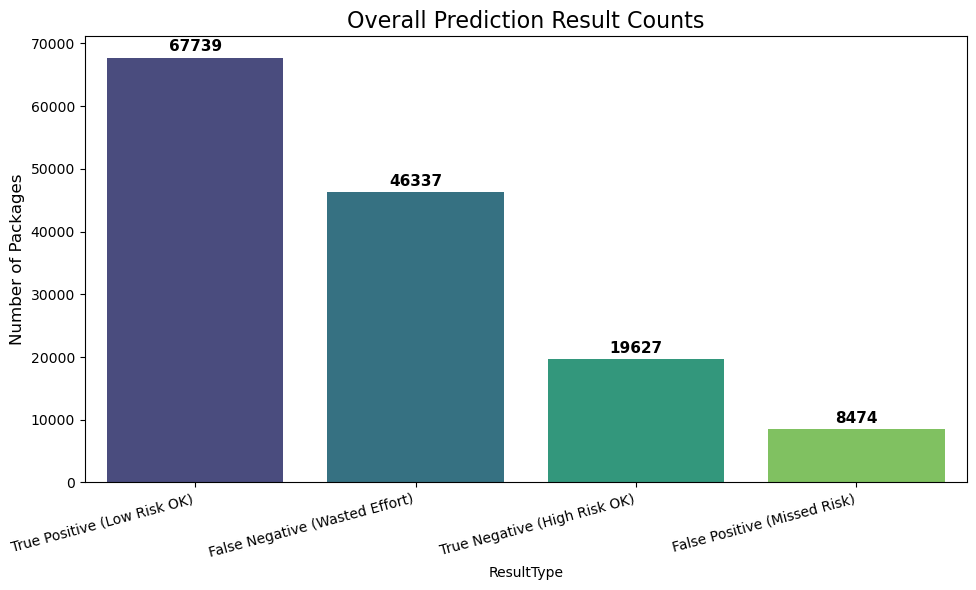

In [22]:
if final_df is not None:
    result_counts = final_df['ResultType'].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')
    plt.title('Overall Prediction Result Counts', fontsize=16)
    plt.ylabel('Number of Packages', fontsize=12)
    plt.xticks(rotation=15, ha="right")
    
    # Add counts on top of bars
    for index, value in enumerate(result_counts):
        plt.text(index, value + 500, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')
        
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not loaded. Skipping analysis.")

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


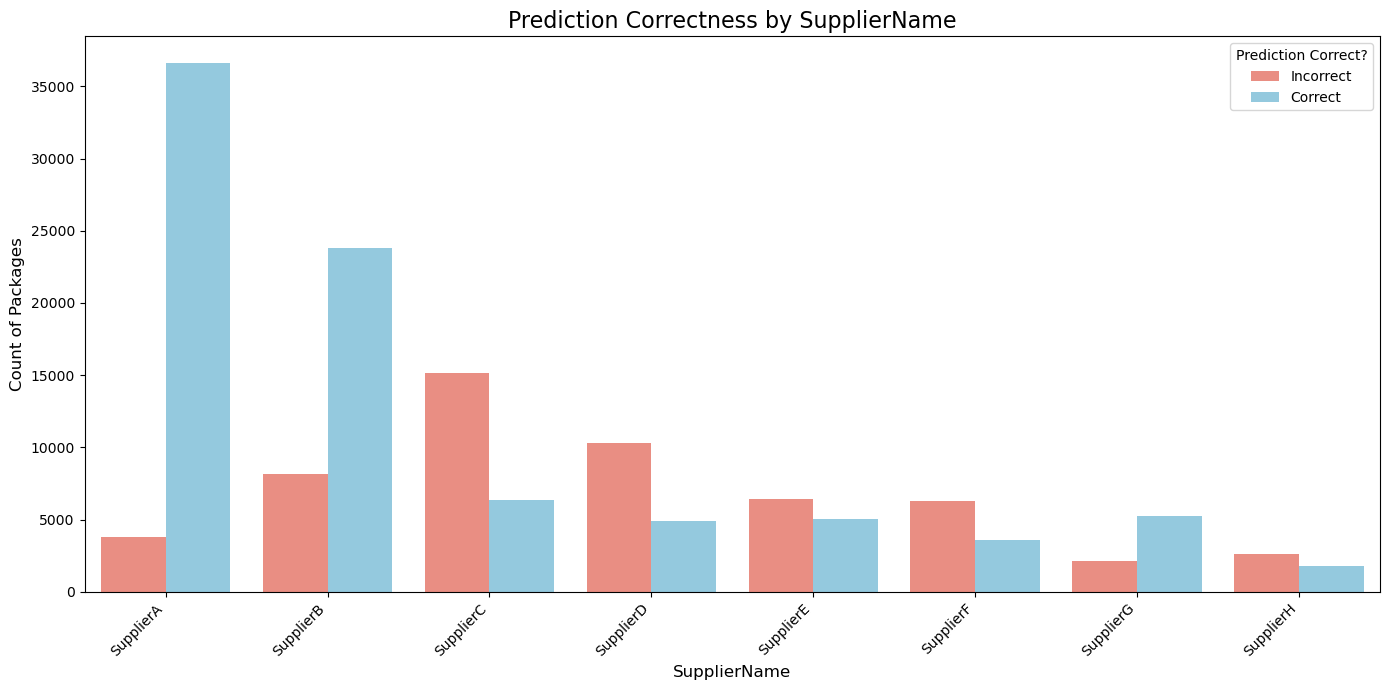

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


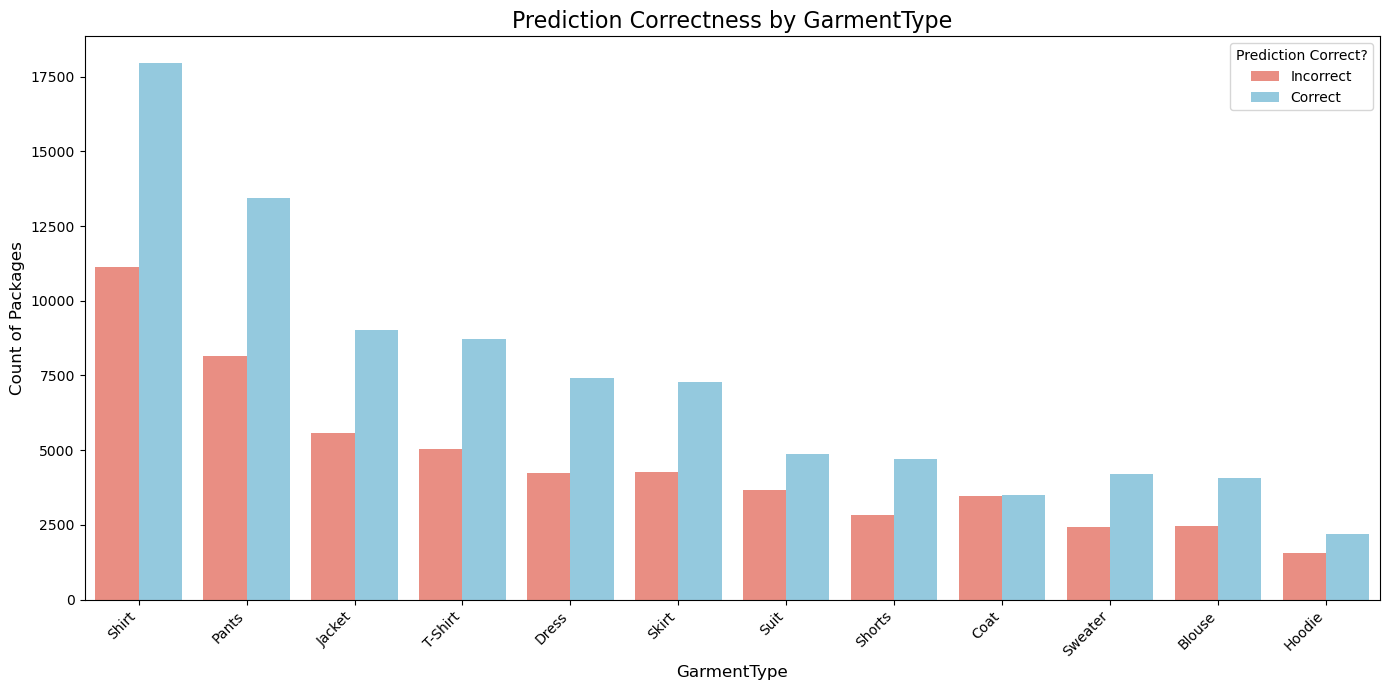

In [23]:
def plot_error_distribution_by_feature(df, feature_col):
    """Compares the distribution of a feature for correct vs. incorrect predictions."""
    plt.figure(figsize=(14, 7))
    
    # Order bars by total count for clarity
    order = df[feature_col].value_counts().index
    
    sns.countplot(data=df, x=feature_col, hue='PredictionCorrect', order=order, palette={True: 'skyblue', False: 'salmon'})
    
    plt.title(f'Prediction Correctness by {feature_col}', fontsize=16)
    plt.xlabel(feature_col, fontsize=12)
    plt.ylabel('Count of Packages', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Prediction Correct?', labels=['Incorrect', 'Correct'])
    plt.tight_layout()
    plt.show()

if final_df is not None:
    # Plot for the most important categorical features
    plot_error_distribution_by_feature(final_df, 'SupplierName')
    plot_error_distribution_by_feature(final_df, 'GarmentType')
else:
    print("DataFrame not loaded. Skipping analysis.")

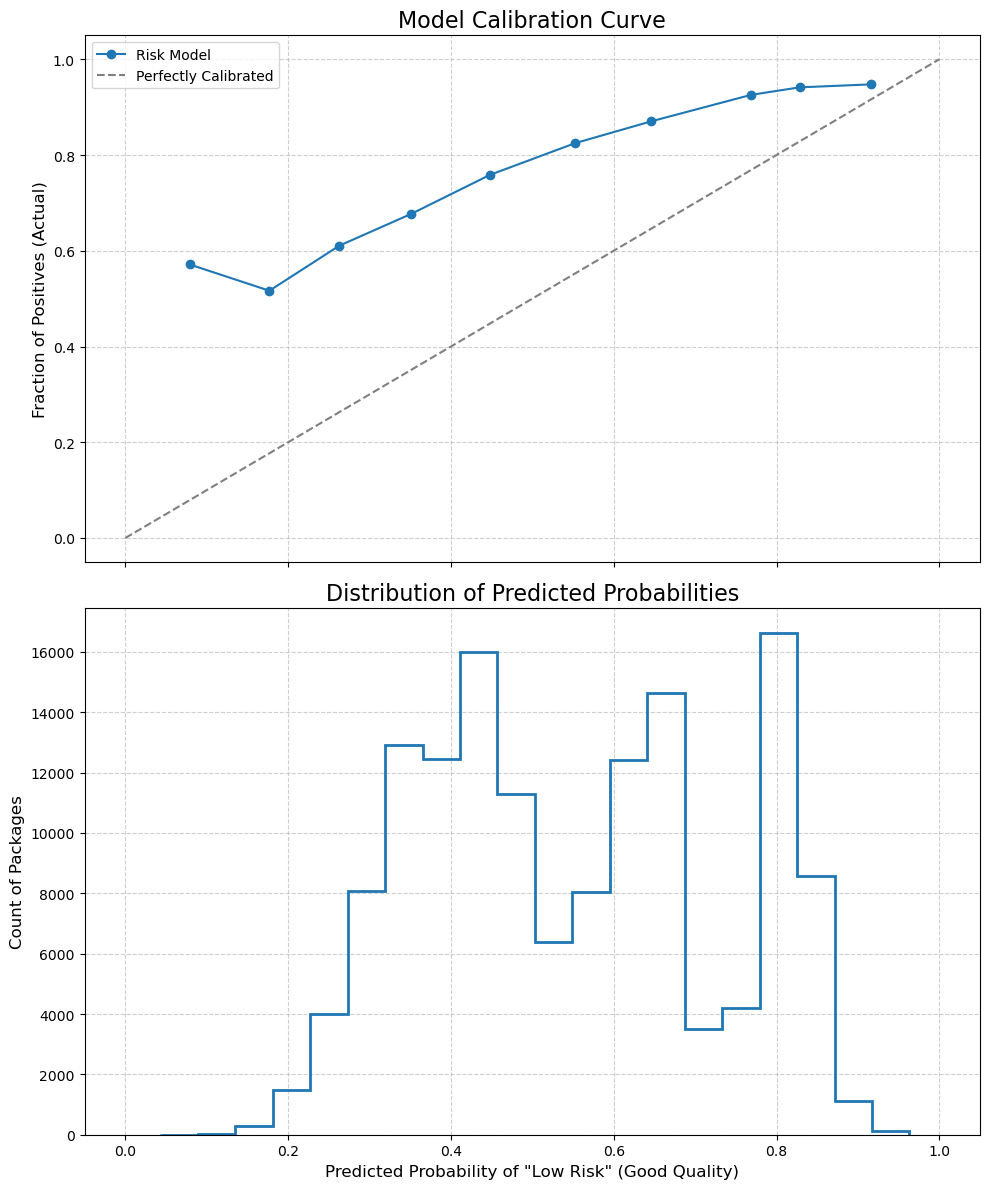

In [25]:
from sklearn.calibration import calibration_curve

if final_df is not None:
    # Get actual outcomes and predicted probabilities for the "Low Risk" class
    y_true = final_df['ActualQuality']
    y_prob = final_df['PredictedQualityProba']
    
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10, strategy='uniform')
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)
    
    # Plot 1: Calibration Curve
    ax1.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Risk Model')
    ax1.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    ax1.set_title('Model Calibration Curve', fontsize=16)
    ax1.set_ylabel('Fraction of Positives (Actual)', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 2: Histogram of Predicted Probabilities
    ax2.hist(y_prob, bins=20, histtype='step', lw=2, density=False)
    ax2.set_title('Distribution of Predicted Probabilities', fontsize=16)
    ax2.set_xlabel('Predicted Probability of "Low Risk" (Good Quality)', fontsize=12)
    ax2.set_ylabel('Count of Packages', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame not loaded. Skipping analysis.")

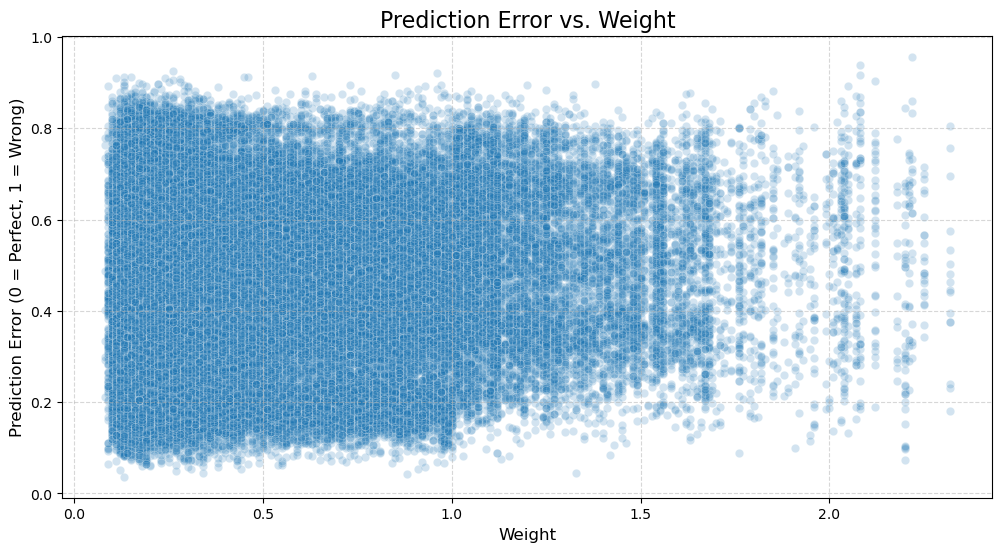

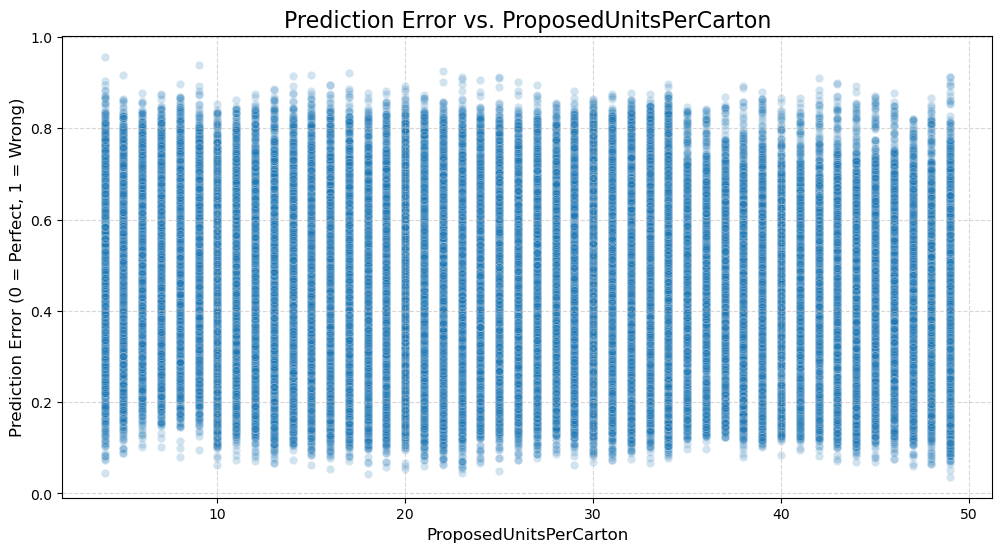

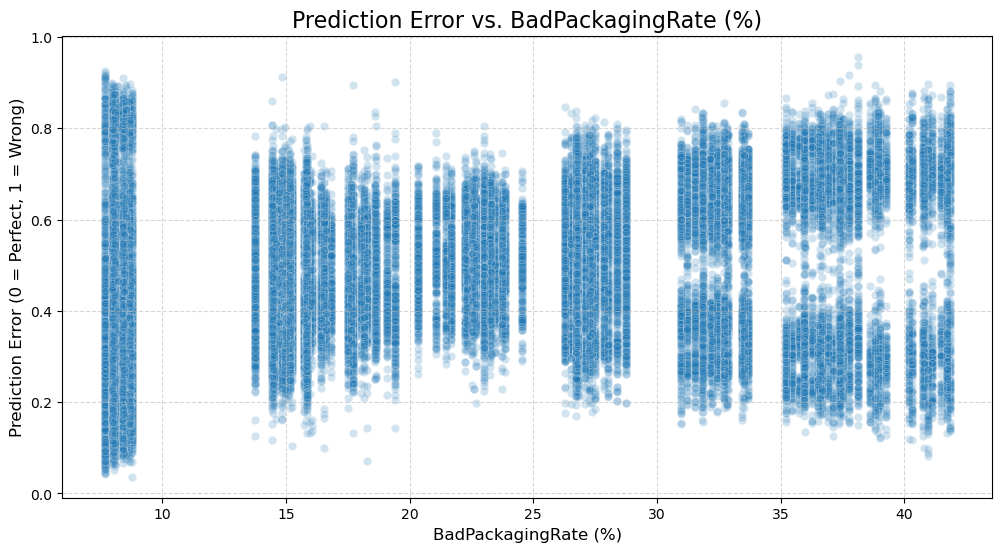

In [26]:
if final_df is not None:
    key_numerical_features = ['Weight', 'ProposedUnitsPerCarton', 'BadPackagingRate (%)']
    
    for feature in key_numerical_features:
        if feature in final_df.columns:
            plt.figure(figsize=(12, 6))
            # Use alpha for transparency to see density
            sns.scatterplot(data=final_df, x=feature, y='PredictionError', alpha=0.2)
            plt.title(f'Prediction Error vs. {feature}', fontsize=16)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel('Prediction Error (0 = Perfect, 1 = Wrong)', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()
else:
    print("DataFrame not loaded. Skipping analysis.")